In [1]:
import torch
from torchzero.benchmarks.restoration import Restoration
from torchzero.optim import RandomSearch
from image_descent import ImageDescent

import matplotlib.pyplot as plt
image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

# Its just random search

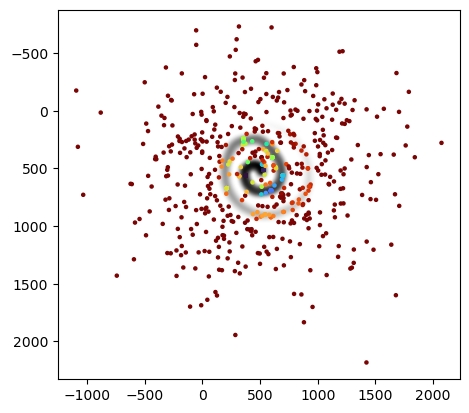

In [18]:
descent = ImageDescent(image, coords=(915, 500))
losses = []
optimizer = RandomSearch(descent.parameters())
for i in range(500):
    print(i, end='\r')
    optimizer.step(descent.step_nograd)
    loss = descent.step_nograd()
    losses.append(loss)
plt.imshow(descent.image, cmap='gray')
plt.scatter(*zip(*descent.get_coord_history_pixels()), c=descent.loss_history, cmap='turbo', s=5)

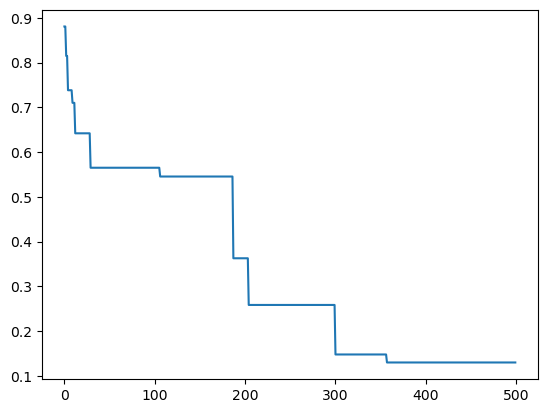

In [19]:
plt.plot(losses)

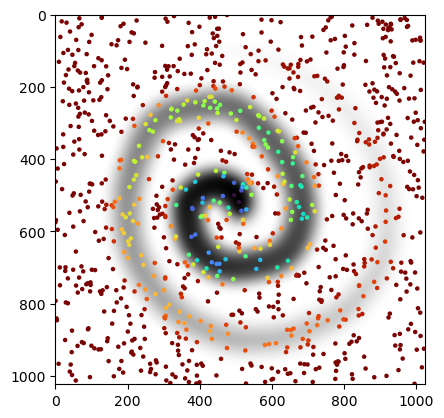

In [16]:
def randlike_in_range(param,**kwargs):
    rand = torch.rand_like(param)
    return rand * 2 - 1
    
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomSearch(descent.parameters(), randlike_in_range)
for i in range(1000):
    print(i, end='\r')
    optimizer.step(descent.step_nograd)
plt.imshow(descent.image, cmap='gray')
plt.scatter(*zip(*descent.get_coord_history_pixels()), c=descent.loss_history, cmap='turbo', s=5)